## FRE6091_HW1_Albert_Lee

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf; yf.pdr_override()
import matplotlib.pyplot as plt 
import numpy as np

**AAPL from 2019-02-05 to 2020-1-31**

In [2]:
data = pdr.get_data_yahoo("AAPL", start="2019-02-05", end="2020-1-31")
print(data.shape)
print(data.head())

[*********************100%***********************]  1 of 1 completed
(250, 6)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-02-05  172.860001  175.080002  172.350006  174.179993  171.195389   
2019-02-06  174.649994  175.570007  172.850006  174.240005  171.254364   
2019-02-07  172.399994  173.940002  170.339996  170.940002  168.010910   
2019-02-08  168.990005  170.660004  168.419998  170.410004  168.208328   
2019-02-11  171.050003  171.210007  169.250000  169.429993  167.240967   

              Volume  
Date                  
2019-02-05  36101600  
2019-02-06  28239600  
2019-02-07  31741700  
2019-02-08  23820000  
2019-02-11  20993400  


#### a. Make a histogram of the price for the last 250 trading days. Does it look normal? What about change in price? What about percent change in price? Which looks the most normal?

Text(0.5, 1.0, 'Histogram for the price')

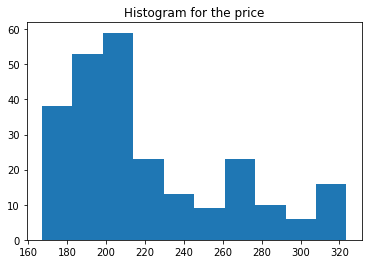

In [3]:
plt.hist(data['Adj Close'])
plt.title('Histogram for the price')

In [4]:
df_price_chg = data.diff(periods=1, axis=0)
df_price_chg.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-05,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-06,1.789993,0.490005,0.500000,0.060013,0.058975,-7862000.0
2019-02-07,-2.250000,-1.630005,-2.510010,-3.300003,-3.243454,3502100.0
2019-02-08,-3.409988,-3.279999,-1.919998,-0.529999,0.197418,-7921700.0
2019-02-11,2.059998,0.550003,0.830002,-0.980011,-0.967361,-2826600.0


C:\Users\alee8\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\alee8\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histogram for the change in price ($)')

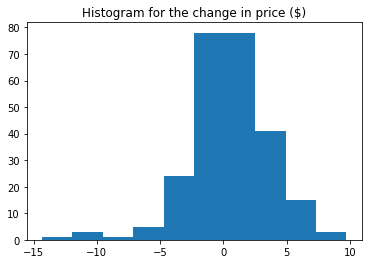

In [5]:
plt.hist(df_price_chg['Adj Close'])
plt.title('Histogram for the change in price ($)')

In [6]:
df_price_pct_chg = data.pct_change(periods=1, axis=0)
df_price_pct_chg.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-05,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-06,0.010355,0.002799,0.002901,0.000345,0.000344,-0.217774
2019-02-07,-0.012883,-0.009284,-0.014521,-0.018939,-0.018939,0.124014
2019-02-08,-0.019780,-0.018857,-0.011272,-0.003100,0.001175,-0.249568
2019-02-11,0.012190,0.003223,0.004928,-0.005751,-0.005751,-0.118665


Text(0.5, 1.0, 'Histogram for the percent change in price')

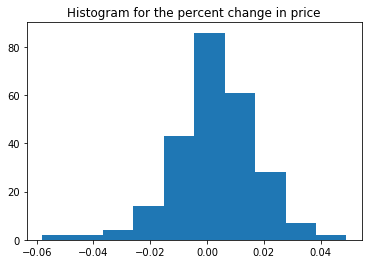

In [7]:
plt.hist(df_price_pct_chg['Adj Close'])
plt.title('Histogram for the percent change in price')

**Answer:** The distribution of the percent change in price looks the most normal

#### b. What is the mean and standard deviation of the % change in price?  Using the observed mean and standard deviation then what would the pdf look like if you wanted to simulate future movements using the normal distribution?

In [8]:
df_price_pct_chg['Adj Close'].mean()

0.0024797966435438903

In [9]:
df_price_pct_chg['Adj Close'].std(ddof=1)

0.014721941330993098

## $\int{\frac{1}{2\pi(0.015)} \exp\{(\frac{1}{2})\frac{(x-0.0025)^2}{(0.015)^2}\} dx}$

#### Central Limit Theorem
#### a. Generate 1000 random variables with an expontial distribution.  Make a histogram of your results. Does it look like a normal distribution or not?

In [10]:
rn1000 = np.random.exponential(1, 1000) 

Text(0.5, 1.0, 'Histogram for 1000 random numbers')

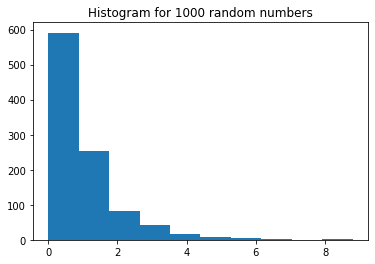

In [11]:
plt.hist(rn1000)
plt.title('Histogram for 1000 random numbers')

#### b. Generate 5000 random variables with an expontial distribution.  Average them 5 at a time so you have 1000 averages.  Make a histogram of your results. Does it look like a normal distribution or not?

In [12]:
rn5000 = np.random.exponential(size=(10000, 5))
avg5 = []
for i in rn5000:
    temp = np.average(i)
    avg5.append(temp)

Text(0.5, 1.0, '1000 AVG. of 5000 random numbers (n=5)')

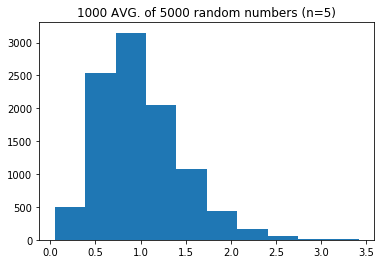

In [13]:
plt.hist(avg5)
plt.title('1000 AVG. of 5000 random numbers (n=5)')

#### c. Generate 20,000 random variables with an expontial distribution.  Average them 20 at a time so you have 20,000 averages.  Make a histogram of your results. Does it look like a normal distribution or not?

In [14]:
rn20000 = np.random.exponential(size=(10000, 20)) 
avg20 = []
for i in rn20000:
    temp = np.average(i)
    avg20.append(temp)

Text(0.5, 1.0, '1000 AVG. of 20000 random numbers (n=20)')

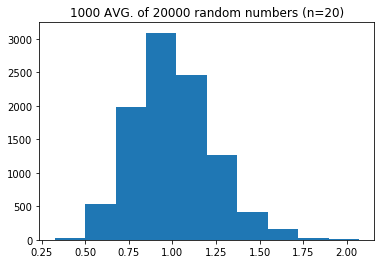

In [15]:
plt.hist(avg20)
plt.title('1000 AVG. of 20000 random numbers (n=20)')

#### d. Confirm that mean and the standard deviations of your histograms in (b) and (c) are what you would expect from the central limit theorem.

In [16]:
print('(b) population_mean=', np.mean(rn5000))
print('(b) mean of sample mean=', np.mean(avg5))
print('(b) population_std=', np.std(rn5000))
print('(b) std of sample mean=', np.std(avg5, ddof=1))
print('')
print('(c) population_mean=', np.mean(rn20000))
print('(c) mean of sample mean=', np.mean(avg20))
print('(c) population_std=', np.std(rn20000))
print('(c) std of sample mean=', np.std(avg20, ddof=1))

(b) population_mean= 0.9962414585434273
(b) mean of sample mean= 0.9962414585434275
(b) population_std= 1.0038625104948813
(b) std of sample mean= 0.453003348318099

(c) population_mean= 1.0044441006435547
(c) mean of sample mean= 1.0044441006435547
(c) population_std= 1.0058346356484293
(c) std of sample mean= 0.2273228649762588


#### e. With your stock data, if you average 5 prices (so you have 50 observations) and make a histogram does the data look normal?  Why not? Hint : Are the observations independent?


In [17]:
data_prices = np.array(data['Adj Close']).reshape(50, 5)

price_avg5 = []
for i in data_prices:
    temp = np.average(i)
    price_avg5.append(temp)

Text(0.5, 1.0, '50 AVG. of 250 random numbers (n=5)')

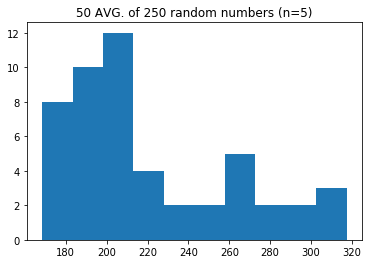

In [18]:
plt.hist(price_avg5)
plt.title('50 AVG. of 250 random numbers (n=5)')

**Answer:** It doesn't look normal because CLT assumes that the random variables are indenpendtly and identically distributed.

#### T-Tests
 We focused on z-tests during class. With this we will do a slight modification for t-test.

for problem 2 (c) and (d) for each set of 5 or 20 data points we are calculating the mean.  We can also calculate the standard deviation.   
If we use the following formula

( mean - true mean ) / (std dev / number of data points )

with number of data points = 5 or 20 

do we still get we are 1 standard deviation away 36% of the time and 1.96 std deviations away 5% of the time?  Which set gives better results the 5 data points or the 20?   

Look up a  t-table for 4 degrees of freedom and 19 degrees of freedom.  They give different numbers than the z table for 36% and 5%.  Do your results match these?

In [19]:
#for the sample size = 5

population_mean5 = np.average(rn5000)
#print(population_mean5)

s5 = np.std(rn5000, axis=1, ddof=1) / np.sqrt(5)
#print(s5)

a = np.abs((avg5 - population_mean5) / s5) > 1 

print('1 std away (5 data pt.):', sum(a) / len(avg5) * 100, '%')

a = np.abs((avg5 - population_mean5) / s5) > 1.96 

print('1.96 std away (5 data pt.):', sum(a) / len(avg5) * 100, '%')

population_mean20 = np.average(rn20000)

s20 = np.std(rn20000, axis=1, ddof=1) / np.sqrt(20)
    
a = np.abs((avg20 - population_mean20) / s20) > 1

print('1 std away (20 data pt.):', sum(a) / len(avg20) * 100, '%')

a = np.abs((avg20 - population_mean20) / s20) > 1.96

print('1.96 std away (20 data pt.):', sum(a) / len(avg20) * 100, '%')

1 std away (5 data pt.): 41.93 %
1.96 std away (5 data pt.): 19.139999999999997 %
1 std away (20 data pt.): 34.77 %
1.96 std away (20 data pt.): 9.9 %


**Answer:** The sets of 20 data points get better results. 

#### T-test:

In [20]:
#for the sample size = 5

a = np.abs((avg5 - population_mean5) / s5) > 1.1402

print('alpha=32%, (5 data pt.):', sum(a) / len(avg5) * 100, '%')

a = np.abs((avg5 - population_mean5) / s5) > 2.776

print('alpha=5%, (5 data pt.):', sum(a) / len(avg5) * 100, '%')
    
a = np.abs((avg20 - population_mean20) / s20) > 1.025

print('alpha=32%, (20 data pt.):', sum(a) / len(avg20) * 100, '%')

a = np.abs((avg20 - population_mean20) / s20) > 2.093

print('alpha=5%, (20 data pt.):', sum(a) / len(avg20) * 100, '%')

alpha=32%, (5 data pt.): 36.26 %
alpha=5%, (5 data pt.): 12.030000000000001 %
alpha=32%, (20 data pt.): 33.81 %
alpha=5%, (20 data pt.): 8.44 %


**Answer:** No, because:
1. The population is not normally distributed
2. The sample sizes (5, 20) are less than 30.  
Therefore, we cannot use normal approximation and neither z-test nor t-test give us correct results.